# <font color = "purple">  Evaluate Hyperparameter Tuning Results</font>

Simple wide residual network has 16 hidden layers, and it is defined as WRN-N-k
<li> k is the width factor </li>
<li> N is the number of residual blocks in wide residual network </li>
<li> to convert to residual network to wide, k should be selected greater than 1. </li>

### <font color="blue">Python libraries</font>

In [1]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import os
import seaborn as sns
warnings.filterwarnings("ignore")

## <font color="green"> Simple Residual Network</font>
Simple Residual Netwok, witdh factor (k) = 1

In [2]:
data  = pd.read_csv("/home/sefika/AE_Parseval_Network/src/data/grid_16_1/grid_16_1.csv", sep=";")

In [3]:
data.head(5)

,Unnamed: 0,Unnamed: 0.1,momentum,learning rate,batch size,loss1,acc1,loss2,acc2,loss3,acc3,widing factor,epoch_stopped,reg_penalty
0,0,0,0.9,0.1,64.0,0.940410,0.701571,1.201604,0.556719,1.026413,0.666667,2.0,50.0,0.010
1,1,1,0.9,0.1,64.0,1.059483,0.691099,1.330701,0.630017,1.191599,0.666667,2.0,100.0,0.010
2,2,2,0.9,0.1,64.0,1.691744,0.584642,1.147779,0.666667,1.305594,0.603839,2.0,150.0,0.010
3,3,3,0.9,0.1,64.0,1.706317,0.575916,1.286703,0.675393,1.279418,0.652705,2.0,50.0,0.001
4,4,4,0.9,0.1,64.0,1.126813,0.677138,1.485356,0.617801,1.464330,0.650960,2.0,100.0,0.001


In [6]:
del data[data.columns[0]]


In [7]:
data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 12 columns):
momentum         54 non-null float64
learning rate    54 non-null float64
batch size       54 non-null float64
loss1            54 non-null float64
acc1             54 non-null float64
loss2            54 non-null float64
acc2             54 non-null float64
loss3            54 non-null float64
acc3             54 non-null float64
widing factor    54 non-null float64
epoch_stopped    54 non-null float64
reg_penalty      54 non-null float64
dtypes: float64(12)
memory usage: 5.2 KB


In [8]:
data.head(5)

,momentum,learning rate,batch size,loss1,acc1,loss2,acc2,loss3,acc3,widing factor,epoch_stopped,reg_penalty
0,0.9,0.1,64.0,0.940410,0.701571,1.201604,0.556719,1.026413,0.666667,2.0,50.0,0.010
1,0.9,0.1,64.0,1.059483,0.691099,1.330701,0.630017,1.191599,0.666667,2.0,100.0,0.010
2,0.9,0.1,64.0,1.691744,0.584642,1.147779,0.666667,1.305594,0.603839,2.0,150.0,0.010
3,0.9,0.1,64.0,1.706317,0.575916,1.286703,0.675393,1.279418,0.652705,2.0,50.0,0.001
4,0.9,0.1,64.0,1.126813,0.677138,1.485356,0.617801,1.464330,0.650960,2.0,100.0,0.001


## <font color ="green"> Evaluation of the hyperparameter tuning results</font>

In [9]:
data["loss_mean"] = (data["loss1"]+data["loss2"]+data["loss3"])/3

In [10]:
data["acc_mean"] = (data["acc1"]+data["acc2"]+data["acc3"])/3

In [11]:
data['epoch'] = data['epoch_stopped']
data['weight_decay'] = data['reg_penalty']

In [12]:
column_list = ["momentum", "learning rate", "epoch","batch size","weight_decay","loss_mean", "acc_mean"]

In [13]:
data.sort_values(axis=0, by="loss_mean", ascending=True)[column_list].head(3)

,momentum,learning rate,epoch,batch size,weight_decay,loss_mean,acc_mean
6,0.9,0.10,50.0,64.0,0.0001,0.942042,0.667830
35,0.9,0.01,150.0,64.0,0.0001,1.028651,0.617219
0,0.9,0.10,50.0,64.0,0.0100,1.056142,0.641652


In [14]:
data["loss_na"] = data.loc[:,["loss1","loss2", "loss3"]].isnull().sum(1)

In [23]:
data.head(3)

,momentum,learning rate,batch size,loss1,acc1,loss2,acc2,loss3,acc3,widing factor,epoch_stopped,reg_penalty,loss_mean,acc_mean,epoch,weight_decay,loss_na
0,0.9,0.1,64.0,0.940410,0.701571,1.201604,0.556719,1.026413,0.666667,2.0,50.0,0.01,1.056142,0.641652,50.0,0.01,0
1,0.9,0.1,64.0,1.059483,0.691099,1.330701,0.630017,1.191599,0.666667,2.0,100.0,0.01,1.193928,0.662595,100.0,0.01,0
2,0.9,0.1,64.0,1.691744,0.584642,1.147779,0.666667,1.305594,0.603839,2.0,150.0,0.01,1.381706,0.618383,150.0,0.01,0


## <font color="green">Increase the width factor to find the better model</font>
Simple Wide Residual Netwok, witdh factor (k) = 2

In [24]:
data_wide_basic  = pd.read_csv("/home/sefika/AE_Parseval_Network/src/data/grid_16_2/grid_16_2.csv", sep=";")

In [25]:
del data_wide_basic[data_wide_basic.columns[0]]

In [26]:
data_wide_basic.head(5)

,momentum,learning rate,batch size,loss1,acc1,loss2,acc2,loss3,acc3,epoch_stopped1,epoch_stopped2,epoch_stopped3,reg_penalty
0,0.9,0.1,64.0,1.345933,0.596859,1.252561,0.623037,1.135268,0.692845,50.0,50.0,50.0,0.010
1,0.9,0.1,64.0,1.203858,0.689354,1.075543,0.689354,1.317599,0.661431,100.0,100.0,100.0,0.010
2,0.9,0.1,64.0,1.368102,0.619546,1.155222,0.670157,1.955448,0.525305,150.0,150.0,150.0,0.010
3,0.9,0.1,64.0,1.613937,0.726003,1.624037,0.712042,2.574726,0.589878,50.0,50.0,50.0,0.001
4,0.9,0.1,64.0,1.439943,0.708551,1.538113,0.685864,1.712331,0.650960,100.0,100.0,100.0,0.001


In [27]:
data_wide_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 13 columns):
momentum          54 non-null float64
learning rate     54 non-null float64
batch size        54 non-null float64
loss1             54 non-null float64
acc1              54 non-null float64
loss2             54 non-null float64
acc2              54 non-null float64
loss3             54 non-null float64
acc3              54 non-null float64
epoch_stopped1    54 non-null float64
epoch_stopped2    54 non-null float64
epoch_stopped3    54 non-null float64
reg_penalty       54 non-null float64
dtypes: float64(13)
memory usage: 5.6 KB


In [28]:
data_wide_basic["loss_mean"] = (data_wide_basic["loss1"]+data_wide_basic["loss2"]+data_wide_basic["loss3"])/3

In [29]:
data_wide_basic["acc_mean"] = (data_wide_basic["acc1"]+data_wide_basic["acc2"]+data_wide_basic["acc3"])/3

In [30]:
data_wide_basic['epoch'] = data_wide_basic['epoch_stopped1']
data_wide_basic['weight_decay'] = data_wide_basic['reg_penalty']

In [31]:
data_wide_basic.sort_values(axis=0, by="loss_mean", ascending=True)[column_list].head(3)

,momentum,learning rate,epoch,batch size,weight_decay,loss_mean,acc_mean
35,0.9,0.01,150.0,64.0,0.0001,1.077292,0.656195
34,0.9,0.01,100.0,64.0,0.0001,1.150234,0.609075
26,0.9,0.10,150.0,256.0,0.0001,1.177924,0.663176


## <font color="green"> Simple Residual Network</font>
Simple Residual Netwok, witdh factor (k) = 4

In [32]:
data_wide_k_4  = pd.read_csv("/home/sefika/AE_Parseval_Network/src/data/grid_16_4/grid_16_4.csv", sep=";")

In [33]:
data_wide_k_4.head(5)

,Unnamed: 0,Unnamed: 0.1,momentum,learning rate,batch size,loss1,acc1,loss2,acc2,loss3,acc3,epoch_stopped1,epoch_stopped2,epoch_stopped3,reg_penalty
0,0,0,0.9,0.1,64.0,1.298214,0.633508,1.236783,0.636998,4.305660,0.410122,50.0,50.0,50.0,0.010
1,1,1,0.9,0.1,64.0,1.396518,0.607330,1.308121,0.659686,1.420260,0.656195,100.0,100.0,100.0,0.010
2,2,2,0.9,0.1,64.0,1.306983,0.668412,1.291781,0.675393,1.731054,0.593368,150.0,150.0,150.0,0.010
3,3,3,0.9,0.1,64.0,2.661683,0.678883,2.509997,0.694590,2.837932,0.652705,50.0,50.0,50.0,0.001
4,4,4,0.9,0.1,64.0,2.100333,0.671902,2.129772,0.640489,2.361759,0.628272,100.0,100.0,100.0,0.001


In [34]:
del data_wide_k_4[data_wide_k_4.columns[0]]
del data_wide_k_4[data_wide_k_4.columns[0]]

In [35]:
data_wide_k_4.head(5)

,momentum,learning rate,batch size,loss1,acc1,loss2,acc2,loss3,acc3,epoch_stopped1,epoch_stopped2,epoch_stopped3,reg_penalty
0,0.9,0.1,64.0,1.298214,0.633508,1.236783,0.636998,4.305660,0.410122,50.0,50.0,50.0,0.010
1,0.9,0.1,64.0,1.396518,0.607330,1.308121,0.659686,1.420260,0.656195,100.0,100.0,100.0,0.010
2,0.9,0.1,64.0,1.306983,0.668412,1.291781,0.675393,1.731054,0.593368,150.0,150.0,150.0,0.010
3,0.9,0.1,64.0,2.661683,0.678883,2.509997,0.694590,2.837932,0.652705,50.0,50.0,50.0,0.001
4,0.9,0.1,64.0,2.100333,0.671902,2.129772,0.640489,2.361759,0.628272,100.0,100.0,100.0,0.001


In [37]:
data_wide_k_4["loss_mean"] = (data_wide_k_4["loss1"]+data_wide_k_4["loss2"]+data_wide_k_4["loss3"])/3
data_wide_k_4["acc_mean"] = (data_wide_k_4["acc1"]+data_wide_k_4["acc2"]+data_wide_k_4["acc3"])/3
data_wide_k_4['epoch'] = data_wide_k_4['epoch_stopped1']
data_wide_k_4['weight_decay'] = data_wide_k_4['reg_penalty']
data_wide_k_4.sort_values(axis=0, by="loss_mean", ascending=True)[column_list].head(3)

,momentum,learning rate,epoch,batch size,weight_decay,loss_mean,acc_mean
1,0.9,0.1,100.0,64.0,0.0100,1.374967,0.641070
24,0.9,0.1,50.0,256.0,0.0001,1.435955,0.576498
9,0.9,0.1,50.0,128.0,0.0100,1.440504,0.646888


## <font color="purple"> Visualization </font>

In [44]:
data_k_4 = data_wide_k_4.sort_values(axis=0, by="loss_mean", ascending=True)[column_list].head(1)
data_k_2 = data_wide_basic.sort_values(axis=0, by="loss_mean", ascending=True)[column_list].head(1)
data_k_1 = data.sort_values(axis=0, by="loss_mean", ascending=True)[column_list].head(1)

## <font color = "blue"> BoxPlot</font>

In [45]:
best_models = pd.concat([data_k_4, data_k_2, data_k_1])

In [52]:
boxplot_data = {'NeuralNetwork': ["ResNet16", "ResNet16", "ResNet16",
                                   "WRN_16_2", "WRN_16_2", "WRN_16_2",
                                   "WRN_16_4","WRN_16_4","WRN_16_4"],
                'Loss': [data['loss1'][6], data['loss2'][6], data['loss3'][6],
                         data_wide_basic['loss1'][35], data_wide_basic['loss2'][35], data_wide_basic['loss3'][35],
                         data_wide_k_4['loss1'][1], data_wide_k_4['loss2'][1], data_wide_k_4['loss3'][1] ]}
boxplot_df = pd.DataFrame(data=boxplot_data)

Text(0.5, 1.0, 'Boxplot of the Best 3 Different Neural Network')

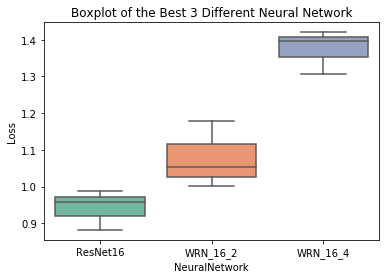

In [61]:
sns.boxplot(x=boxplot_df["NeuralNetwork"], y=boxplot_df["Loss"], palette="Set2")
plt.title("Boxplot of the Best 3 Different Neural Network")

In [49]:
best_models.sort_values(axis=0, by="loss_mean", ascending=True)[column_list]

,momentum,learning rate,epoch,batch size,weight_decay,loss_mean,acc_mean
6,0.9,0.10,50.0,64.0,0.0001,0.942042,0.667830
35,0.9,0.01,150.0,64.0,0.0001,1.077292,0.656195
1,0.9,0.10,100.0,64.0,0.0100,1.374967,0.641070


<font color="green">Consequently, it can be seen that increasing the widing factor results in high loss values and loss mean on the results of hyperparameter tuning.
   
   However, we will train the simple residual network and simple wide residual networks on the rest of the project.</font>

## <font color= "Purple">Visualize the parameters of the Best Model </font>

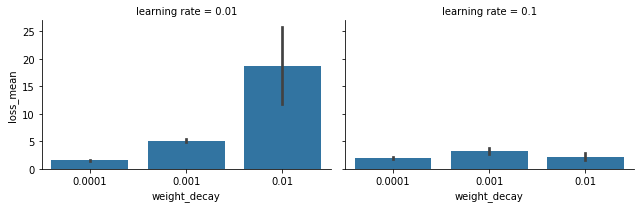

In [72]:
g = sns.FacetGrid(data_wide_k_4, col="learning rate", sharey=True, aspect=1.5, margin_titles=True)
g.map(sns.barplot, "weight_decay", "loss_mean")
plt.show()

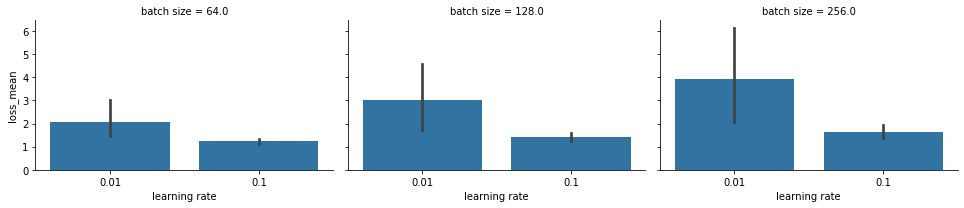

In [71]:
g = sns.FacetGrid(data, col = "batch size", sharey=True, aspect=1.5, margin_titles=True)
g.map(sns.barplot, "learning rate", "loss_mean", order = [0.01, 0.1])
plt.show()

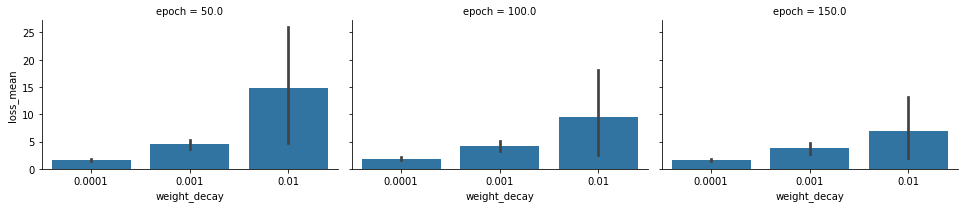

In [74]:
g = sns.FacetGrid(data_wide_k_4, col="epoch", sharey=True, aspect=1.5, margin_titles=True)
g.map(sns.barplot, "weight_decay", "loss_mean")
plt.show()

<font color= "blue">As a result of the analysis,   </font>

## <font color="blue"><b>Conclusion:</b></font>

<font color="purple">
    <b>
        <center> Sefika Efeoglu</center>
        <center>Universiteat Potsdam</center>
    </b>
</font>